In [1]:
pip install pandas matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # Y축 쉼표(,) 포맷팅을 위해

In [5]:
df = pd.read_csv('./100 Sales Records.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
# 2-1. 사용할 컬럼 정의
date_col = 'Order Date'
revenue_col = 'Total Revenue'

# 2-2. 'Order Date' 컬럼을 datetime 객체로 변환 (날짜로 인식)
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 2-3. 'Total Revenue' 컬럼을 숫자로 변환 (문자일 경우 대비)
df[revenue_col] = pd.to_numeric(df[revenue_col], errors='coerce')

# 2-4. 변환에 실패한 행(NaN)이 있다면 제거
df = df.dropna(subset=[date_col, revenue_col])

print("--- 2. 날짜 및 수익 컬럼 전처리 완료 ---")

--- 2. 날짜 및 수익 컬럼 전처리 완료 ---


In [9]:
# 3-1. 월 번호 (정렬용) / 월 이름 (X축 레이블용) 추출
df['Month_Num'] = df[date_col].dt.month
df['Month_Name'] = df[date_col].dt.strftime('%B') # %B: 'January', %b: 'Jan'

# 3-2. 월별로 'Total Revenue' 합계 계산
# groupby 후 reset_index()를 하면 그룹키(월)도 컬럼으로 나옵니다.
monthly_sales = df.groupby(['Month_Num', 'Month_Name'])[revenue_col].sum().reset_index()

# 3-3. (중요) 월 번호(Month_Num) 기준으로 정렬
# (이걸 안 하면 4월(April)이 8월(August)보다 앞에 나옵니다)
monthly_sales = monthly_sales.sort_values(by='Month_Num')

print("--- 3. 월별 판매량 집계 (정렬 완료) ---")
print(monthly_sales[['Month_Name', 'Total Revenue']].head())

--- 3. 월별 판매량 집계 (정렬 완료) ---
  Month_Name  Total Revenue
0    January    10482467.12
1   February    24740517.77
2      March     2274823.87
3      April    16187186.33
4        May    13215739.99



--- 4. 막대 그래프 생성 완료 ---


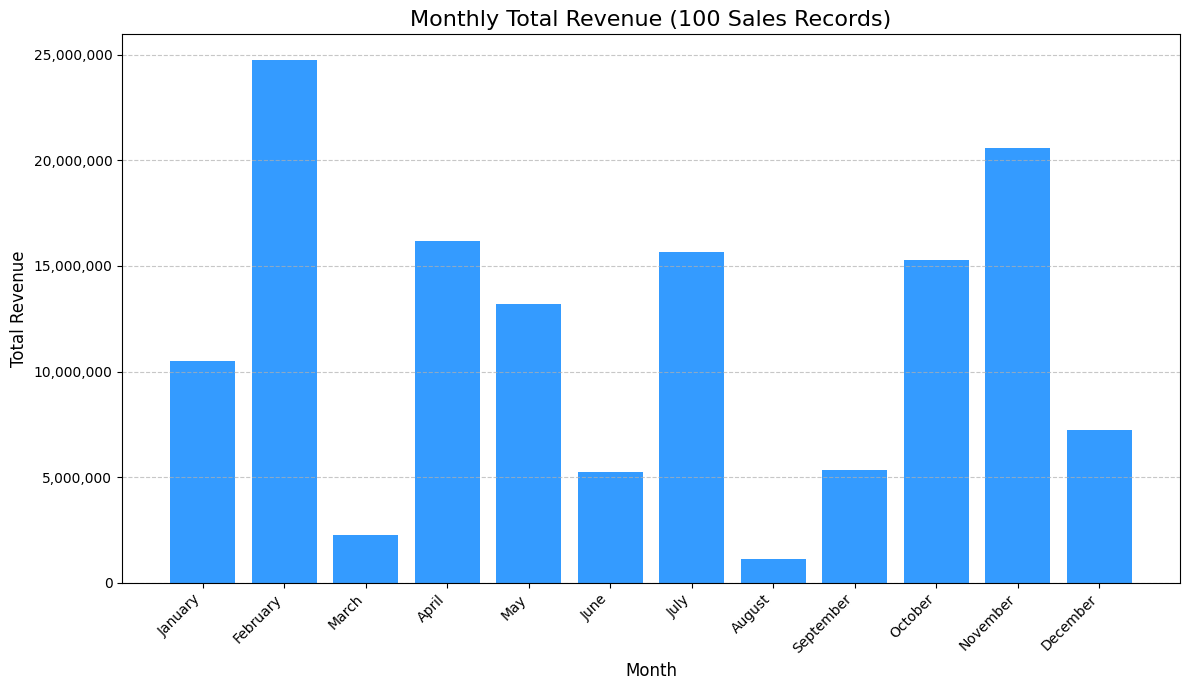

In [10]:

plt.figure(figsize=(12, 7)) # 가로 12, 세로 7인치

# X축: 월 이름, Y축: 총 수익
plt.bar(
  monthly_sales['Month_Name'],
  monthly_sales[revenue_col],
  color='dodgerblue', # 막대 색상
  alpha=0.9 # 막대 투명도 (선택 사항)
)

# --- 5. 그래프 꾸미기 ---
plt.title('Monthly Total Revenue (100 Sales Records)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# X축 레이블(월 이름)이 겹치지 않도록 45도 회전
plt.xticks(rotation=45, ha='right')

# Y축 포맷팅: 100000 -> 100,000 (쉼표 추가)
ax = plt.gca() # Get Current Axis (현재 그래프 축 가져오기)
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Y축 기준선(그리드) 추가 (가독성 향상)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 레이블이 그림 밖으로 잘려나가지 않도록 설정
plt.tight_layout()

# --- 6. 그래프 표시 ---
print("\n--- 4. 막대 그래프 생성 완료 ---")
plt.show()